**Load the Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import LabelEncoder

**Load the dataset**


In [5]:
# read csv file
df = pd.read_csv('Marketing Campaign data.csv') 

**Checking Metadata table**

In [6]:
# print meta table 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

**Check for missing data**

In [ ]:
#replaces the blank and ? entries with NaN
df.replace('?', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)

#Prints the number of columns for each attribute that is missing
print(df.isnull().sum())

CUST_ID                     0
CUST_GENDER                 0
AGE                         0
CUST_MARITAL_STATUS         0
COUNTRY_NAME                0
CUST_INCOME_LEVEL           0
EDUCATION                   0
OCCUPATION                 80
HOUSEHOLD_SIZE              0
YRS_RESIDENCE               0
AFFINITY_CARD               0
BULK_PACK_DISKETTES         0
FLAT_PANEL_MONITOR          0
HOME_THEATER_PACKAGE        0
BOOKKEEPING_APPLICATION     0
PRINTER_SUPPLIES            0
Y_BOX_GAMES                 0
OS_DOC_SET_KANJI            0
COMMENTS                   73
dtype: int64


**Check for unique values**

In [ ]:
# Specify the column to exclude
exclude_col = 'COMMENTS'

# Loop through each column in the dataframe
for col in df.columns:
    if col == exclude_col:
        continue  # skip this column
    # Get the unique values in the column
    unique_values = np.unique(df[col].astype(str))
    
    # Print the unique values for the column
    print(f"Column {col} has {len(unique_values)} unique values:")
    print(unique_values)

Column CUST_ID has 1500 unique values:
['101501' '101502' '101503' ... '102998' '102999' '103000']
Column CUST_GENDER has 2 unique values:
['F' 'M']
Column AGE has 66 unique values:
['17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '82' '90']
Column CUST_MARITAL_STATUS has 7 unique values:
['Divorc.' 'Mabsent' 'Mar-AF' 'Married' 'NeverM' 'Separ.' 'Widowed']
Column COUNTRY_NAME has 19 unique values:
['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'Denmark' 'France'
 'Germany' 'Italy' 'Japan' 'New Zealand' 'Poland' 'Saudi Arabia'
 'Singapore' 'South Africa' 'Spain' 'Turkey' 'United Kingdom'
 'United States of America']
Column CUST_INCOME_LEVEL has 12 unique values:
['A: Below 30,000' 'B: 30,000 - 49,999' 'C: 50,000

**Chi-Square Contigency**

In [ ]:
# Calculate the chi-square test for categorical variables
cat_vars = ['CUST_GENDER', 'CUST_MARITAL_STATUS', 'COUNTRY_NAME', 'CUST_INCOME_LEVEL', 'EDUCATION', 'OCCUPATION']
chi2_values = []
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df['AFFINITY_CARD'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_values.append(chi2)

# Print the chi-square test results
print(pd.DataFrame({'Variable': cat_vars, 'Chi-Square': chi2_values}))

              Variable  Chi-Square
0          CUST_GENDER   75.770362
1  CUST_MARITAL_STATUS  318.400737
2         COUNTRY_NAME   33.355885
3    CUST_INCOME_LEVEL   14.766735
4            EDUCATION  236.897382
5           OCCUPATION  178.225548


**Correlation Matrix**

In [ ]:
# Check the correlation between variables
correlation_matrix = df.corr()
print(correlation_matrix['AFFINITY_CARD'].sort_values(ascending=False))

AFFINITY_CARD              1.000000
YRS_RESIDENCE              0.342691
HOME_THEATER_PACKAGE       0.283358
AGE                        0.246711
BOOKKEEPING_APPLICATION    0.162404
BULK_PACK_DISKETTES       -0.017887
CUST_ID                   -0.025969
OS_DOC_SET_KANJI          -0.026075
FLAT_PANEL_MONITOR        -0.028467
Y_BOX_GAMES               -0.281121
PRINTER_SUPPLIES                NaN
Name: AFFINITY_CARD, dtype: float64


<ipython-input-140-798202e693fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


**Correlation Matrix heatmap**

<ipython-input-141-c1c589f77b10>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<Axes: >

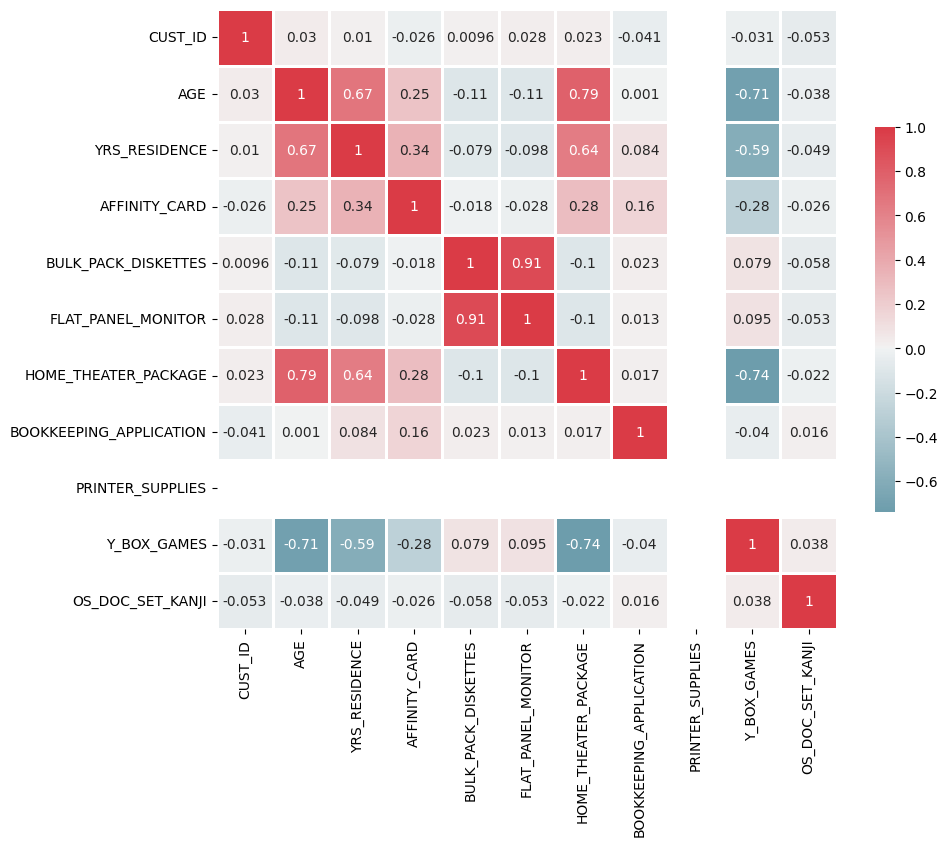

In [ ]:
#Call the correlation function
correlations = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220,10, as_cmap=True)
#Check the correlation heatmap
sns.heatmap(correlations, cmap=cmap, center=0, square=True, linewidths=.9, annot=True, cbar_kws={"shrink":.5})


**Drop Columns with Little or no influence on AFFINITY_CARD**

In [ ]:
# Remove CUST_ID, PRINTER_SIUPPLIES, COMMENTS attributes
df = df.drop(['CUST_ID','PRINTER_SUPPLIES','BULK_PACK_DISKETTES','OS_DOC_SET_KANJI', 'COMMENTS'], axis=1)


**Replace "?" values with "Unknown"**

In [ ]:
import pandas as pd

#replace entries denoted by "?" with NaN
df['OCCUPATION'].replace('?', np.nan, inplace=True)

#Use pandas to get the mode of the column
mode_value = df['OCCUPATION'].mode()[0]

# Replace NaN values with 'Unknown'
df['OCCUPATION'].fillna('Unknown', inplace=True)

#confirm by checking the frequency of values in the column.
print(df['OCCUPATION'].value_counts())

Exec.      197
Crafts     196
Sales      178
Cleric.    178
Prof.      169
Other      154
Machine    108
Unknown     80
Transp.     59
Handler     56
TechSup     45
Farming     42
Protec.     29
House-s      7
Armed-F      2
Name: OCCUPATION, dtype: int64


**Gender accoring to their ordinal numbers**

In [ ]:
# Replace "F" with 0 and "M" with 1 
df['CUST_GENDER'] = np.where(df['CUST_GENDER']=='F', 0, 1)

**Checking for the ordinal number values of Gender**

In [ ]:
df['CUST_GENDER'].values

array([0, 1, 0, ..., 1, 1, 0])

**Country name according to their Ordinal Numbers in descending order**

In [ ]:
# create a dictionary of unique countries and their counts
countries = df["COUNTRY_NAME"].value_counts().to_dict()

# sort the dictionary by count in descending order
sorted_countries = dict(sorted(countries.items(), key=lambda x: x[1], reverse=True))

# create a mapping of countries to ordinal numbers
ordinal_map = {}
ordinal_number = 1
for country in sorted_countries:
    ordinal_map[country] = ordinal_number
    ordinal_number += 1

# apply the mapping
df["COUNTRY_NAME"] = df["COUNTRY_NAME"].map(ordinal_map)

# print the ouput of the mappings
print(f"{'Country':<15} {'Ordinal Number':<35}")
for country in countries:
    print(f"{country}: {ordinal_map[country]}")

Country         Ordinal Number                     
United States of America: 1
Argentina: 2
Italy: 3
Brazil: 4
Canada: 5
Germany: 6
Poland: 7
United Kingdom: 8
Denmark: 9
Saudi Arabia: 10
China: 11
Singapore: 12
New Zealand: 13
Japan: 14
Australia: 15
South Africa: 16
France: 17
Turkey: 18
Spain: 19


**Income Levels according to their ordinal numbers**

In [ ]:
# define the income levels and their corresponding ordinal numbers
income_levels = ['A: Below 30,000', 'B: 30,000 - 49,999', 'C: 50,000 - 69,999', 'D: 70,000 - 89,999',
                 'E: 90,000 - 109,999', 'F: 110,000 - 129,999', 'G: 130,000 - 149,999', 'H: 150,000 - 169,999',
                 'I: 170,000 - 189,999', 'J: 190,000 - 249,999', 'K: 250,000 - 299,999', 'L: 300,000 and above']
ordinal_numbers = list(range(1, 13))

# map the income levels to their corresponding ordinal numbers using numpy
mapping = dict(zip(income_levels, ordinal_numbers))
df['CUST_INCOME_LEVEL'] = df['CUST_INCOME_LEVEL'].map(mapping)

# print the transformed DataFrame
print(df)

      CUST_GENDER  AGE CUST_MARITAL_STATUS  COUNTRY_NAME  CUST_INCOME_LEVEL  \
0               0   41              NeverM             1                 10   
1               1   27              NeverM             1                  9   
2               0   20              NeverM             1                  8   
3               1   45             Married             1                  2   
4               1   34              NeverM             1                 11   
...           ...  ...                 ...           ...                ...   
1495            1   17              NeverM             1                  3   
1496            1   41             Married            19                 12   
1497            1   53             Married             1                 10   
1498            1   55             Married             1                  3   
1499            0   40             Divorc.             1                  5   

     EDUCATION OCCUPATION HOUSEHOLD_SIZE  YRS_RESID

**Education variable value count**

In [ ]:
print(df['EDUCATION'].value_counts())

HS-grad    482
< Bach.    359
Bach.      245
Masters     70
Assoc-V     60
Assoc-A     46
10th        44
11th        39
Profsc      34
7th-8th     31
9th         26
PhD         25
12th        22
5th-6th     11
1st-4th      3
Presch.      3
Name: EDUCATION, dtype: int64


**EDUCATION into ordinal numbers in descending order**

In [ ]:
# Define the education level oridinal numbers in descending order
education_mapping = {
    'Presch.': 16,
    '1st-4th': 15,
    '5th-6th': 14,
    '7th-8th': 13,
    '9th': 12,
    '10th': 11,
    '11th': 10,
    '12th': 9,
    'HS-grad': 8,
    'Assoc-A': 7,
    'Assoc-V': 6,
    '< Bach.': 5,
    'Bach.': 4,
    'Masters': 3,
    'PhD': 2,
    'Profsc': 1    
}

# Apply the education level mapping to the 'EDUCATION' column
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: education_mapping[x])

**HOUSEHOLD_SIZE into ordinal numbers in descending order**

In [ ]:
# define a dictionary to map the values to ordinal numbers
household_mapping = {'1': 6, '2': 5, '3': 4, '4-5': 3, '6-8': 2, '9+': 1}

# use the map method to replace the values with ordinal numbers
df['HOUSEHOLD_SIZE'] = df['HOUSEHOLD_SIZE'].apply(lambda x: household_mapping[x])
# save the preprocessed data to a csv
df = df.to_csv("preprocessed_data.csv", index=False)


**Load the cleaned data**

In [ ]:
# read csv file
df = pd.read_csv('preprocessed_data.csv')

**Summary statistics of sum, mean, standard deviation, skewness, and kurtosis of numeric variables**

In [ ]:
# Remove non-numeric columns
summ_df = df.select_dtypes(include=np.number)

# Get summary statistics for each variable
summary_stats = summ_df.describe()

# Add skewness and kurtosis to the summary statistics
summary_stats.loc['skewness'] = stats.skew(summ_df)
summary_stats.loc['kurtosis'] = stats.kurtosis(summ_df)

# Print the summary statistics
print(summary_stats)

          CUST_GENDER     AGE  COUNTRY_NAME  CUST_INCOME_LEVEL  EDUCATION  \
count         1500.00 1500.00       1500.00            1500.00    1500.00   
mean             0.68   38.89          1.43               8.13       6.43   
std              0.47   13.64          1.79               3.09       2.65   
min              0.00   17.00          1.00               1.00       1.00   
25%              0.00   28.00          1.00               6.00       5.00   
50%              1.00   37.00          1.00               9.00       6.00   
75%              1.00   47.00          1.00              10.00       8.00   
max              1.00   90.00         19.00              12.00      16.00   
skewness        -0.75    0.59          5.64              -0.65       0.57   
kurtosis        -1.43    0.00         35.89              -0.64       0.36   

          HOUSEHOLD_SIZE  YRS_RESIDENCE  AFFINITY_CARD  FLAT_PANEL_MONITOR  \
count            1500.00        1500.00        1500.00             1500.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_GENDER              1500 non-null   int64 
 1   AGE                      1500 non-null   int64 
 2   CUST_MARITAL_STATUS      1500 non-null   object
 3   COUNTRY_NAME             1500 non-null   int64 
 4   CUST_INCOME_LEVEL        1500 non-null   int64 
 5   EDUCATION                1500 non-null   int64 
 6   OCCUPATION               1500 non-null   object
 7   HOUSEHOLD_SIZE           1500 non-null   int64 
 8   YRS_RESIDENCE            1500 non-null   int64 
 9   AFFINITY_CARD            1500 non-null   int64 
 10  FLAT_PANEL_MONITOR       1500 non-null   int64 
 11  HOME_THEATER_PACKAGE     1500 non-null   int64 
 12  BOOKKEEPING_APPLICATION  1500 non-null   int64 
 13  Y_BOX_GAMES              1500 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 16

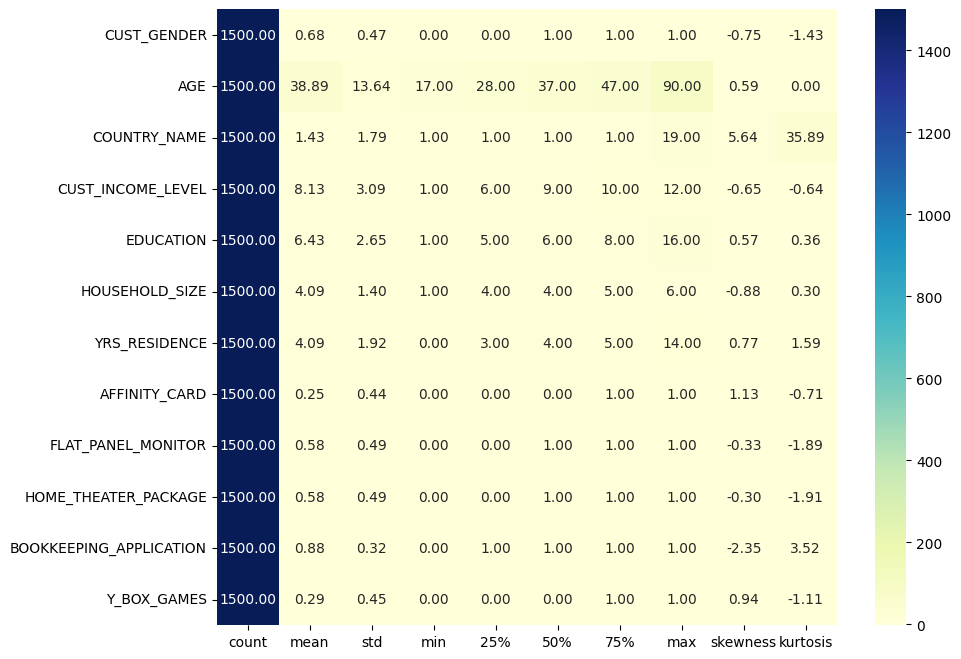

In [ ]:
# Set display options for pandas
pd.set_option('display.float_format', '{:.2f}'.format)  # Display float values with 2 decimal places

# Set figure size
plt.figure(figsize=(10, 8)) 

# Concatenate the statistics and transpose the DataFrame
stats_df = pd.concat([summary_stats], axis=0).T

# Create a heatmap using seaborn
sns.heatmap(stats_df, annot=True, fmt=".2f",  cmap='YlGnBu')

# Display the heatmap
plt.show()

**Correlation of each variable with AFFINITY_CARD**

In [ ]:
# Specify the name of the target variable
target_variable = 'AFFINITY_CARD'

# Calculate the correlation of each variable with the target variable
corr = df.corr()[target_variable]

# Print the correlation of each variable with the target variable
print(corr)

CUST_GENDER                0.23
AGE                        0.25
COUNTRY_NAME               0.01
CUST_INCOME_LEVEL         -0.02
EDUCATION                 -0.32
HOUSEHOLD_SIZE            -0.05
YRS_RESIDENCE              0.34
AFFINITY_CARD              1.00
FLAT_PANEL_MONITOR        -0.03
HOME_THEATER_PACKAGE       0.28
BOOKKEEPING_APPLICATION    0.16
Y_BOX_GAMES               -0.28
Name: AFFINITY_CARD, dtype: float64


<ipython-input-65-ec3c204bcf96>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()[target_variable]


<ipython-input-66-a707b6ca8148>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr = df.corr()["AFFINITY_CARD"]


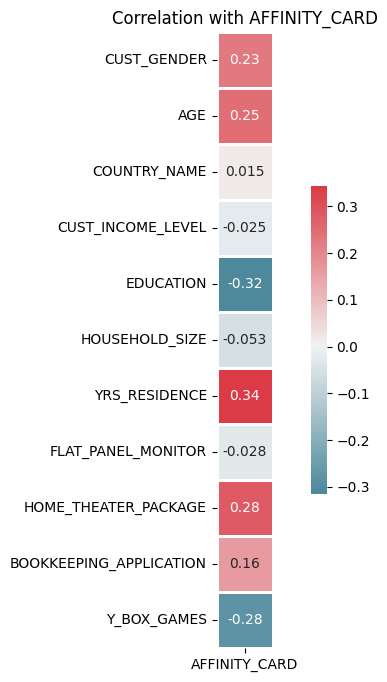

In [ ]:
target_corr = df.corr()["AFFINITY_CARD"]
target_corr = target_corr.drop("AFFINITY_CARD")

fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(target_corr.to_frame(), cmap=cmap, center=0, square=True, linewidths=.9, annot=True, cbar_kws={"shrink": .5})

plt.title("Correlation with AFFINITY_CARD")
plt.show()

**Histogram Plot for any two user chosen variables**

Enter the column name (or 'exit' to quit): CUST_INCOME_LEVEL


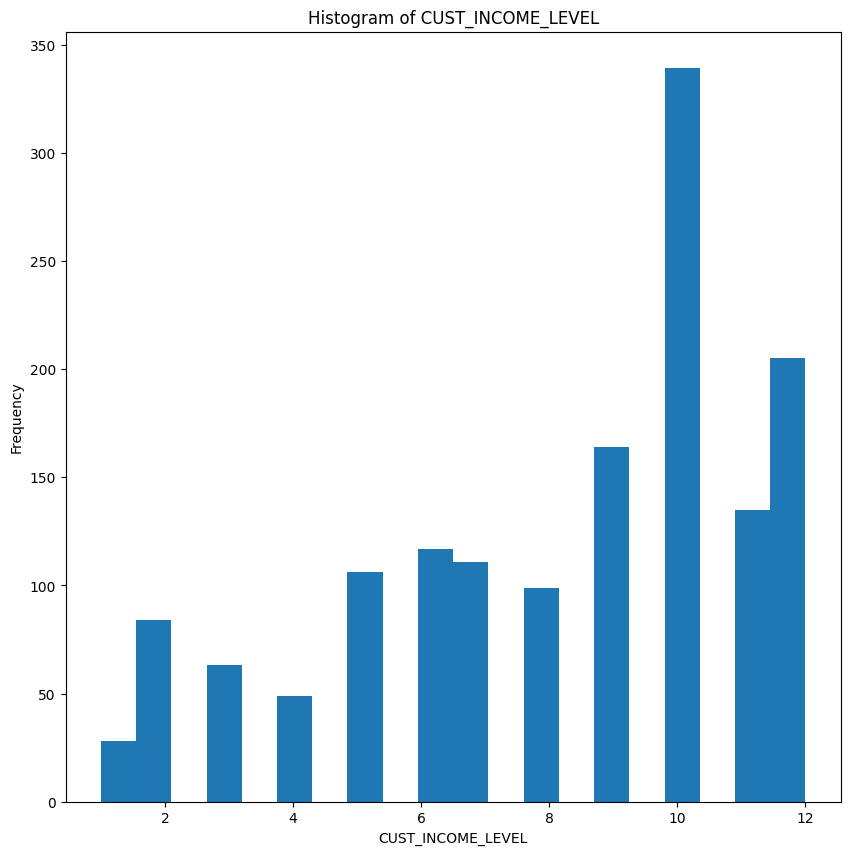

Enter the column name (or 'exit' to quit): quit
Column 'quit' not found in file cleaneddata.csv'.
Enter the column name (or 'exit' to quit): exit


In [ ]:
# Function to plot histogram
def plot_histogram(data, column_name):
    plt.hist(data[column_name], bins = 20)
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()

# Loop until user chooses to exit
while True:
    # Get the column name from the user
    column_name = input("Enter the column name (or 'exit' to quit): ")
    if column_name.lower() == "exit":
        break

    # Load the CSV file into a pandas dataframe
    try:
        data = pd.DataFrame(df)
    except FileNotFoundError:
        print("File 'data' not found.")
        continue

    # Check if the column exists in the dataframe
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found in file cleaneddata.csv'.")
        continue

    # Plot the histogram
    plot_histogram(data, column_name)


**Scatter Plot for any two user chosen variables**

Enter the name of the x-axis column (or type 'exit' to quit): AGE
Enter the name of the y-axis column (or type 'exit' to quit): EDUCATION


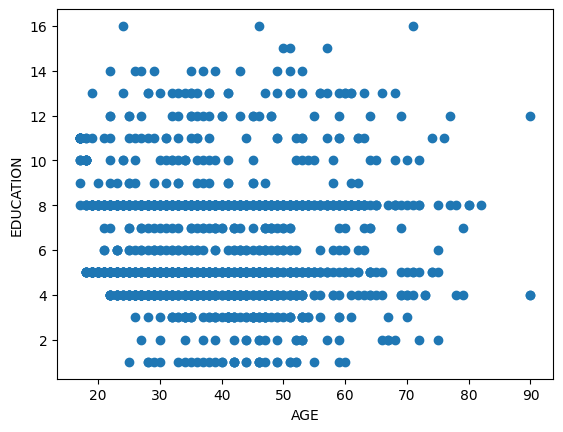

Enter the name of the x-axis column (or type 'exit' to quit): AGE
Enter the name of the y-axis column (or type 'exit' to quit): CUST_INCOME_LEVEL


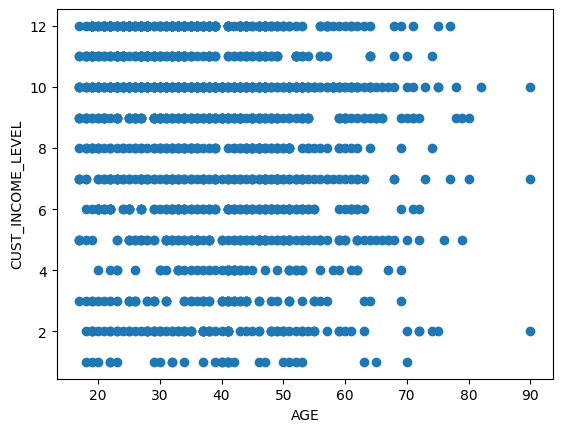

Enter the name of the x-axis column (or type 'exit' to quit): exit


In [ ]:
# Get the column names
cols = df.columns.tolist()

# Loop until user chooses to exit
while True:
    # Get the two column names from the user
    col_x = input("Enter the name of the x-axis column (or type 'exit' to quit): ")
    if col_x == "exit":
        break
    col_y = input("Enter the name of the y-axis column (or type 'exit' to quit): ")
    if col_y == "exit":
        break

    # Check if the columns exist in the DataFrame
    if col_x not in cols or col_y not in cols:
        print("One or both of the column names entered do not exist in the CSV file. Please try again.")
        continue

    # Create the scatter plot
    plt.scatter(df[col_x], df[col_y])
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_GENDER              1500 non-null   int64 
 1   AGE                      1500 non-null   int64 
 2   CUST_MARITAL_STATUS      1500 non-null   object
 3   COUNTRY_NAME             1500 non-null   int64 
 4   CUST_INCOME_LEVEL        1500 non-null   int64 
 5   EDUCATION                1500 non-null   int64 
 6   OCCUPATION               1500 non-null   object
 7   HOUSEHOLD_SIZE           1500 non-null   int64 
 8   YRS_RESIDENCE            1500 non-null   int64 
 9   AFFINITY_CARD            1500 non-null   int64 
 10  FLAT_PANEL_MONITOR       1500 non-null   int64 
 11  HOME_THEATER_PACKAGE     1500 non-null   int64 
 12  BOOKKEEPING_APPLICATION  1500 non-null   int64 
 13  Y_BOX_GAMES              1500 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 16

In [ ]:
# Create dummy variables for 'CUST_MARITAL_STATUS'
marital_status_dummies = pd.get_dummies(df['CUST_MARITAL_STATUS'], prefix='MARITAL_STATUS')

# Create dummy variables for 'OCCUPATION'
occupation_dummies = pd.get_dummies(df['OCCUPATION'], prefix='OCCUPATION')

# Concatenate the dummy variables with the original dataframe
df_encoded = pd.concat([df, marital_status_dummies, occupation_dummies], axis=1)

# Remove the original columns
df_encoded.drop(['CUST_MARITAL_STATUS', 'OCCUPATION'], axis=1, inplace=True)

# Save the encoded dataframe to a CSV file
df_encoded.to_csv('final_data.csv', index=False)

print("Encoded dataframe saved to 'final_data.csv'.")

Encoded dataframe saved to 'final_data.csv'.


## **Building Two Predictive Models**

**Load necessary libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Load the data into a pandas DataFrame
df = pd.read_csv('final_data.csv')

**Undersample the data**

In [ ]:
# Separate the minority and majority classes
minority_class = df[df['AFFINITY_CARD'] == 1]
majority_class = df[df['AFFINITY_CARD'] == 0]

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to False for undersampling
                                 n_samples=len(minority_class),  # Match the number of minority samples
                                 random_state=42)  # Set a random seed for reproducibility

# Combine the minority class and undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Split the undersampled dataset into features (X) and target variable (y)
X = undersampled_df.drop('AFFINITY_CARD', axis=1)
y = undersampled_df['AFFINITY_CARD']


**Split into training and testing datasets**

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [ ]:
# Create a Logistic Regression Model
logreg_model = LogisticRegression()

#Fit the model to the training data
logreg_model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = logreg_model.predict(X_test)

#AUC and ROC
logreg_auc = roc_auc_score(y_test, y_pred)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, y_pred)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8092105263157895
Precision: 0.7578947368421053
Recall: 0.9230769230769231
F1-score: 0.8323699421965319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Calculate the Model Score**

In [ ]:
# Calculate the model score on the testing data
score = logreg_model.score(X_test, y_test)
print("Model Score:", score)

Model Score: 0.8092105263157895


**Create a Confusion Matrix**

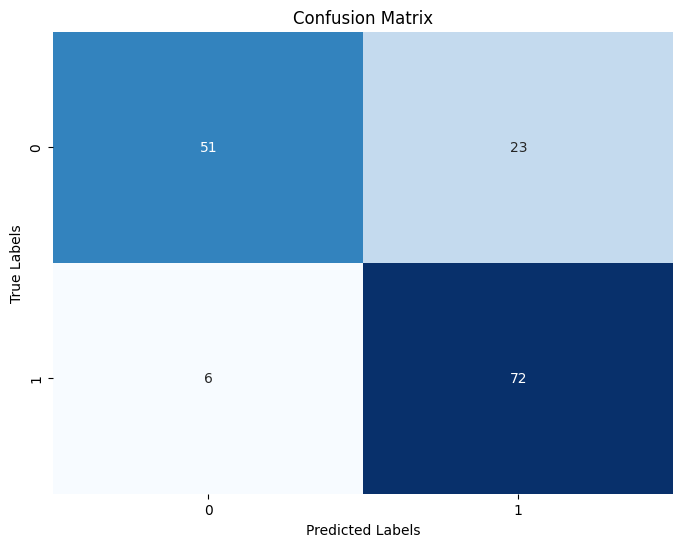

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Classification Report**

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78        74
           1       0.76      0.92      0.83        78

    accuracy                           0.81       152
   macro avg       0.83      0.81      0.81       152
weighted avg       0.82      0.81      0.81       152



**Random Forest Classifier**


**Load Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.utils import resample
df = pd.read_csv('final_data.csv')

**Undersample the dataset**

In [ ]:
# Separate the minority and majority classes
minority_class = df[df['AFFINITY_CARD'] == 1]
majority_class = df[df['AFFINITY_CARD'] == 0]

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to False for undersampling
                                 n_samples=len(minority_class),  # Match the number of minority samples
                                 random_state=42)  # Set a random seed for reproducibility

# Combine the minority class and undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Split the undersampled dataset into features (X) and target variable (y)
X = undersampled_df.drop('AFFINITY_CARD', axis=1)
y = undersampled_df['AFFINITY_CARD']

**Split into test and training data**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model and Predict using Random Forest Classifier**

In [ ]:
# Create an XGBoost classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

#AUC and ROC 
rfc_auc = roc_auc_score(y_test, y_pred)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, y_pred)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8421052631578947
Precision: 0.813953488372093
Recall: 0.8974358974358975
F1-score: 0.8536585365853658


**Model Score**

In [ ]:
# Calculate the model score on the testing data
score =  rf_classifier.score(X_test, y_test)
print("Model Score:", score)

Model Score: 0.8421052631578947


**Confusion Matrix**

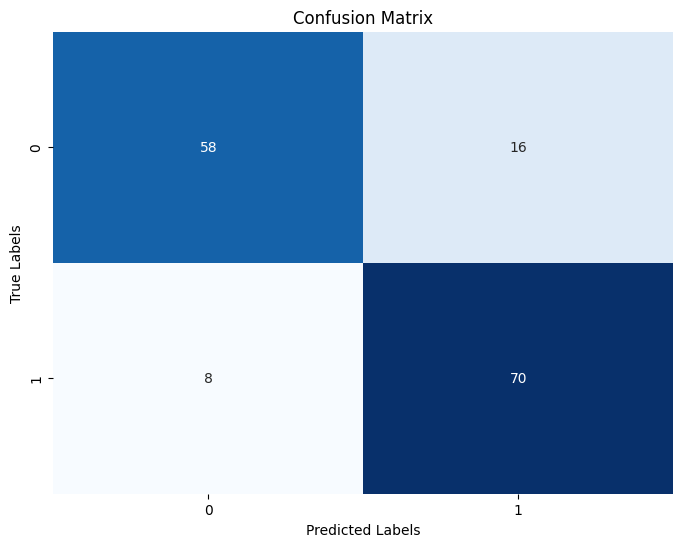

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Classification Report**

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        74
           1       0.81      0.90      0.85        78

    accuracy                           0.84       152
   macro avg       0.85      0.84      0.84       152
weighted avg       0.85      0.84      0.84       152



**ROC Curve**

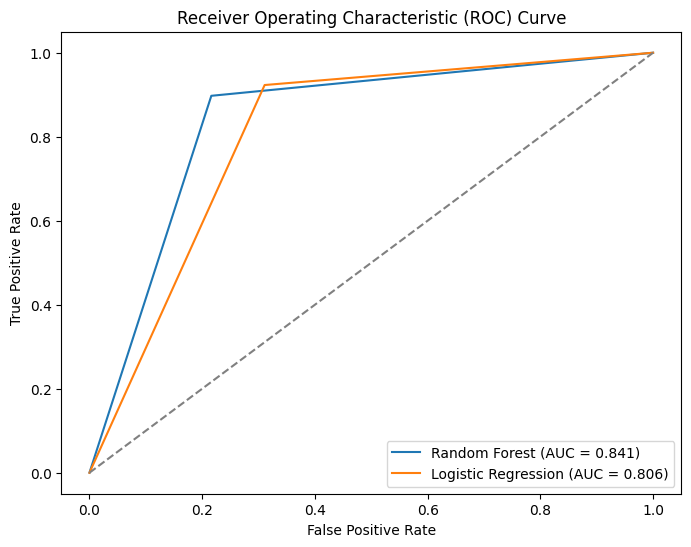

In [ ]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (AUC = {:.3f})'.format(rfc_auc))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.3f})'.format(logreg_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
